In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [183]:
data = pd.read_csv("malicious_phish.csv")

In [184]:
count = data["type"].value_counts()

<BarContainer object of 4 artists>

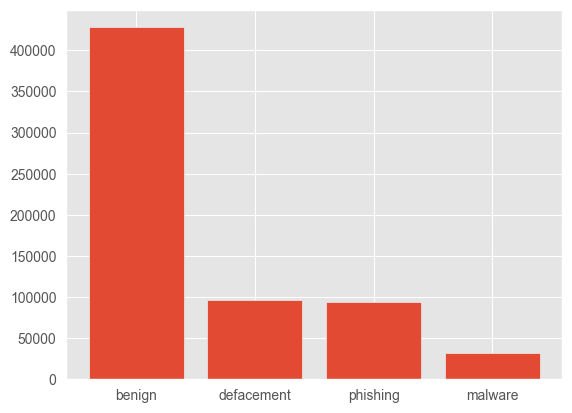

In [185]:
plt.style.use("ggplot")

plt.bar(count.index, count.values)

In [186]:
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [187]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [188]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing": 2, "malware": 3}}
data["Category"] = data["type"]
data = data.replace(rem)

In [189]:
data

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2


In [190]:
from tld import get_tld, is_tld


def process_tld(url):
    try:
        res = get_tld(url, as_object=True, fail_silently=False, fix_protocol=True)
        pri_domain = res.parsed_url.netloc
    except:
        pri_domain = None
    return pri_domain

In [191]:
data["Domain"] = data["url"].apply(lambda x: process_tld(x))

In [192]:
data

,url,type,Category,Domain
0,br-icloud.com.br,phishing,2,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,www.garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org


In [193]:
# data.fillna("NULL")

# nulldata = data.loc[data["Domain"] == "NULL", "Domain"]
# nulldata

data["Domain"].isnull().sum()

# data.loc[data["Domain"].isnull(), :]

# data.to_csv("url_updated.csv")

12217

In [194]:
import re

data["url"] = data["url"].replace("www.", "", regex=True)
data

,url,type,Category,Domain
0,br-icloud.com.br,phishing,2,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,www.garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org


In [195]:
feature = ["@", "?", "-", "=", ".", "#", "%", "+", "$", "!", "*", ",", "//"]
for a in feature:
    data[a] = data["url"].apply(lambda i: i.count(a))

In [196]:
data.head()

,url,type,Category,Domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,www.garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [197]:
from urllib.parse import urlparse


test_hostname = urlparse(data["url"][3]).hostname
print(str(test_hostname))

match = re.search(test_hostname, data["url"][3])
print(match.group())

garage-pirenne.be
garage-pirenne.be


In [198]:
def abnormal(url):
    host = urlparse(url).hostname
    host = str(host)
    match = re.search(host, url)
    # print(host)
    # print(match.group())
    if match:
        return 1
    else:
        return 0

In [199]:
ans = abnormal(data["url"][100])
ans

0

In [200]:
data["abnormal_url"] = data["url"].apply(lambda i: abnormal(i))

<Axes: xlabel='abnormal_url', ylabel='count'>

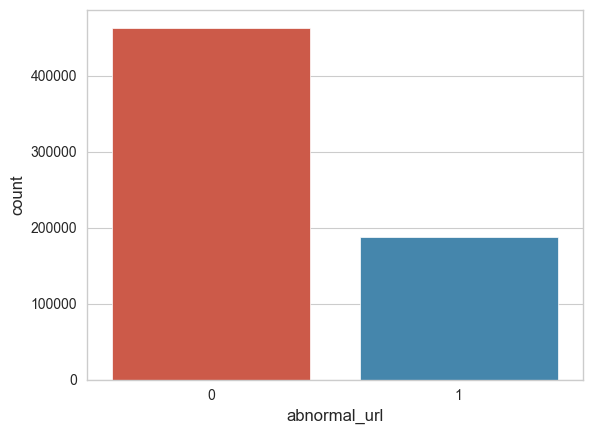

In [201]:
import seaborn as sns

sns.set_style("whitegrid")

sns.countplot(x="abnormal_url", data=data)

In [202]:
data

,url,type,Category,Domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,www.garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,0,3,0,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,2,0,2,0,0,0,0,0,0,0,0,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,0,1,0,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [203]:
test_scheme = urlparse(data["url"][100]).scheme
print(str(test_scheme))

In [204]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match == "https":
        return 1
    else:
        return 0

In [205]:
data["https"] = data["url"].apply(lambda i: httpSecure(i))

<Axes: xlabel='https', ylabel='count'>

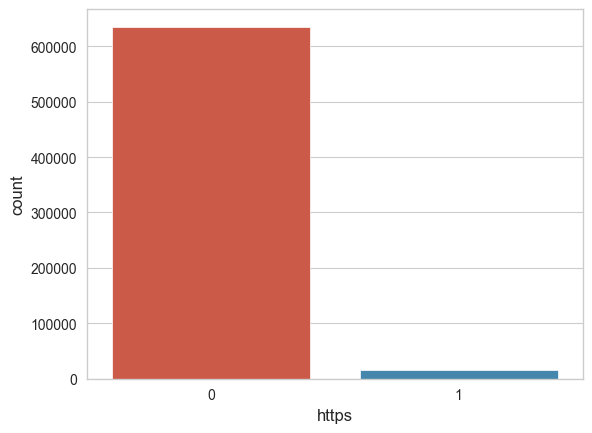

In [206]:
sns.countplot(x="https", data=data)

In [207]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [208]:
data["digits"] = data["url"].apply(lambda i: digit_count(i))
data

,url,type,Category,Domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,www.garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,12
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,7
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [209]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [210]:
data["letters"] = data["url"].apply(lambda i: letter_count(i))

In [211]:
data

,url,type,Category,Domain,@,?,-,=,.,#,...,+,$,!,*,",",//,abnormal_url,https,digits,letters
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,www.garage-pirenne.be,0,1,1,4,2,0,...,0,0,0,0,0,1,1,0,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1,1,3,2,0,...,0,0,0,0,0,1,1,0,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,12,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,2,0,2,0,...,0,0,0,0,0,0,0,0,7,29
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,30
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,36


In [212]:
data.loc[data["letters"] > 200]

,url,type,Category,Domain,@,?,-,=,.,#,...,+,$,!,*,",",//,abnormal_url,https,digits,letters
915,http://bkr-laserscanning.de/index.php?option=c...,defacement,1,www.bkr-laserscanning.de,0,1,1,3,2,0,...,0,0,0,0,0,1,1,0,33,226
1061,http://seckmauern.de/index.php?option=com_mail...,defacement,1,www.seckmauern.de,0,1,0,4,2,0,...,0,0,0,0,0,1,1,0,27,208
1459,im.indli.com/search/Singer%20Sunitha%20Sarathy...,benign,0,im.indli.com,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,58,216
1965,http://escolareiarthur.com.br/index.php?option...,defacement,1,www.escolareiarthur.com.br,0,1,0,4,3,0,...,0,0,0,0,0,1,1,0,31,236
2179,http://kaempre.com/index.php?option=com_mailto...,defacement,1,kaempre.com,0,1,0,3,2,0,...,0,0,0,0,0,1,1,0,31,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602411,loadcell.co.id/paypal/log.htm?=paypal=_login-s...,benign,0,loadcell.co.id,0,4,2,10,3,0,...,0,0,0,0,0,0,0,0,12,212
602456,help-paypal.fr.webapps.mpp.home-update.account...,benign,0,help-paypal.fr.webapps.mpp.home-update.account...,0,1,8,2,12,0,...,0,0,0,0,0,0,0,0,85,201
602719,oddcomparison.eu/fileadmin/CVRV/dessing/ccvs/l...,benign,0,oddcomparison.eu,0,1,1,13,2,0,...,0,0,0,0,0,0,0,0,5,209
602821,paypal.com.info.a6s5f4e89f65a.af65a4f65e4f5a46...,benign,0,paypal.com.info.a6s5f4e89f65a.af65a4f65e4f5a46...,0,1,2,2,15,0,...,0,0,0,0,0,0,0,0,175,268


In [213]:
data

,url,type,Category,Domain,@,?,-,=,.,#,...,+,$,!,*,",",//,abnormal_url,https,digits,letters
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,www.garage-pirenne.be,0,1,1,4,2,0,...,0,0,0,0,0,1,1,0,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1,1,3,2,0,...,0,0,0,0,0,1,1,0,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,12,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,2,0,2,0,...,0,0,0,0,0,0,0,0,7,29
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,30
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,36


In [214]:
def Shortining_Service(url):
    match = re.search(
        "bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|"
        "yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|"
        "short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|"
        "doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|"
        "db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|"
        "q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|"
        "x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|"
        "tr\.im|link\.zip\.net",
        url,
    )
    if match:
        return 1
    else:
        return 0

In [215]:
data["Shortining_Service"] = data["url"].apply(lambda x: Shortining_Service(x))

<Axes: xlabel='Shortining_Service', ylabel='count'>

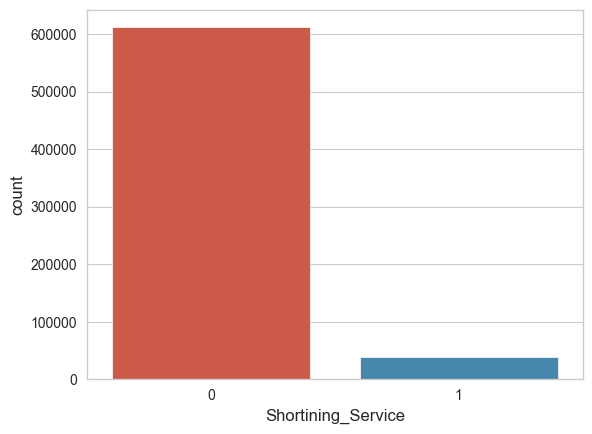

In [216]:
sns.countplot(x="Shortining_Service", data=data)

In [217]:
data.loc[data["Shortining_Service"] == 1].count()

url                   39755
type                  39755
Category              39755
Domain                39755
@                     39755
?                     39755
-                     39755
=                     39755
.                     39755
#                     39755
%                     39755
+                     39755
$                     39755
!                     39755
*                     39755
,                     39755
//                    39755
abnormal_url          39755
https                 39755
digits                39755
letters               39755
Shortining_Service    39755
dtype: int64

In [218]:
data

,url,type,Category,Domain,@,?,-,=,.,#,...,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service
0,br-icloud.com.br,phishing,2,br-icloud.com.br,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,mp3raid.com,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,bopsecrets.org,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,www.garage-pirenne.be,0,1,1,4,2,0,...,0,0,0,0,1,1,0,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,adventure-nicaragua.net,0,1,1,3,2,0,...,0,0,0,0,1,1,0,22,199,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,xbox360.ign.com,0,0,0,0,3,0,...,0,0,0,0,0,0,0,12,21,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,games.teamxbox.com,0,0,2,0,2,0,...,0,0,0,0,0,0,0,7,29,1
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,www.gamespot.com,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3,30,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,en.wikipedia.org,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,36,0


In [219]:
X = data.drop(["url", "type", "Category", "Domain"], axis=1)
y = data["Category"]

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
print(acc)

0.8753599152327644


In [247]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
print(acc)
joblib.dump(model, "model_ETC_1.pkl")

0.8752370641666475


['model_ETC_1.pkl']

In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(pred, y_test)
print(acc)
joblib.dump(model, "model_DTC_1.pkl")

0.871820268890271


['model_DTC_1.pkl']

In [222]:
import joblib

joblib.dump(model, "model_RFC_1.pkl")

['model_RFC_1.pkl']

In [223]:
first_row = X_test.iloc[[0]]
first_row

,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service
238731,0,1,1,5,2,0,0,0,0,0,0,0,1,1,0,2,76,0


In [224]:
predd = ["benign", "defacement", "phishing", "malware"]

In [225]:
loaded_model = joblib.load("model_RFC_1.pkl")

for i in range(1, 10):
    test = X.iloc[[i]]
    print(test)
    predictions = loaded_model.predict(test)
    print(" Predicted :" + predd[predictions[0]] + " Value :" + data["type"][i])

   @  ?  -  =  .  #  %  +  $  !  *  ,  //  abnormal_url  https  digits  \
1  0  0  0  0  2  0  0  0  0  0  0  0   0             0      0       1   

   letters  Shortining_Service  
1       29                   0  
 Predicted :benign Value :benign
   @  ?  -  =  .  #  %  +  $  !  *  ,  //  abnormal_url  https  digits  \
2  0  0  0  0  2  0  0  0  0  0  0  0   0             0      0       1   

   letters  Shortining_Service  
2       25                   0  
 Predicted :benign Value :benign
   @  ?  -  =  .  #  %  +  $  !  *  ,  //  abnormal_url  https  digits  \
3  0  1  1  4  2  0  0  0  0  0  0  0   1             1      0       7   

   letters  Shortining_Service  
3       60                   0  
 Predicted :defacement Value :defacement
   @  ?  -  =  .  #  %  +  $  !  *  ,  //  abnormal_url  https  digits  \
4  0  1  1  3  2  0  0  0  0  0  0  0   1             1      0      22   

   letters  Shortining_Service  
4      199                   0  
 Predicted :defacement Value :def

# Function for testing ML model on String 

In [226]:
predd = ["benign", "defacement", "phishing", "malware"]


def data_pre(input_str):
    input_data = {
        "@": [0],
        "?": [0],
        "-": [0],
        "=": [0],
        ".": [0],
        "#": [0],
        "%": [0],
        "+": [0],
        "$": [0],
        "!": [0],
        "*": [0],
        ",": [0],
        "//": [0],
        "abnormal_url": [0],
        "https": [0],
        "digits": [0],
        "letters": [0],
        "Shortining_Service": [0],
    }
    preproc = pd.DataFrame(input_data)
    loaded_model = joblib.load("model_RFC_1.pkl")
    preproc["@"] = input_str.count("@")
    preproc["?"] = input_str.count("?")
    preproc["-"] = input_str.count("-")
    preproc["="] = input_str.count("=")
    preproc["."] = input_str.count(".")
    preproc["#"] = input_str.count("#")
    preproc["%"] = input_str.count("%")
    preproc["+"] = input_str.count("+")
    preproc["$"] = input_str.count("$")
    preproc["!"] = input_str.count("!")
    preproc["*"] = input_str.count("*")
    preproc[","] = input_str.count(",")
    preproc["//"] = input_str.count("//")
    preproc["abnormal_url"] = abnormal(input_str)
    preproc["https"] = int("https" in input_str)
    preproc["digits"] = sum(1 for char in input_str if char.isdigit())
    preproc["letters"] = sum(1 for char in input_str if char.isalpha())
    preproc["Shortining_Service"] = Shortining_Service(input_str)
    predictions = loaded_model.predict(preproc)
    predd = ["benign", "defacement", "phishing", "malware"]

    return predd[predictions[0]]

# Safe Famous Websites

In [227]:
famous = pd.read_csv("Web_Scrapped_websites.csv")
famous

,Website
0,www.google.com.af
1,www.google.com
2,www.youtube.com
3,www.facebook.com
4,www.yahoo.com
...,...
7382,www.beforward.jp
7383,www.classifieds.co.zw
7384,www.lifebuzz.com
7385,www.chronicle.co.zw


In [228]:
famous.isnull().sum()
famous

,Website
0,google.com.af
1,google.com
2,youtube.com
3,facebook.com
4,yahoo.com
...,...
7382,beforward.jp
7383,classifieds.co.zw
7384,lifebuzz.com
7385,chronicle.co.zw


In [229]:
def safe_url(input_str):
    try:
        result = get_tld(
            input_str, as_object=True, fail_silently=False, fix_protocol=True
        )
        domain = result.parsed_url.netloc
        domain = str(domain)

        domain = domain.split(".")
        # print(domain)
        domain_str = domain[1] + "." + domain[2]
        domain_str = str(domain_str)
        # print(domain_str)
        if domain_str in famous["Website"].values:
            return 1
        else:
            return 0
    except:
        return 0

In [230]:
print(safe_url("https://en.wikipedia.org/wiki/French_Revolution"))

1


In [231]:
famous["Website"][6]

'wikipedia.org'

# Harmful Confirmed Websites


In [249]:
harm = pd.read_csv("Ultimate.csv")

In [250]:
harm = harm[harm["label"] != 0]

In [251]:
harm["url"] = harm["url"].replace("/", "", regex=True)

In [235]:
harm

,url,label
4,001web.net,1
5,005mall.com,1
6,0dese-mi.com,1
7,0j9.ru,1
8,0l6.ru,1
...,...,...
3655309,23.227.196.215,1
3655310,apple-checker.org,1
3655311,apple-iclods.org,1
3655312,apple-uptoday.org,1


In [252]:
harm["url"].isnull().sum()

0

In [253]:
harm = harm.drop("label", axis=1)

In [254]:
harm.to_csv("Ultimate.csv")

In [238]:
def harmful_url(input_str):
    try:
        result = get_tld(
            input_str, as_object=True, fail_silently=False, fix_protocol=True
        )
        domain = result.parsed_url.netloc
        domain = str(domain)
        # print(domain)
        domain = domain.replace("www.", "")
        # print(domain)
        if domain in harm["url"].values:
            return 1
        else:
            return 0
    except:
        return 0

In [239]:
print(harmful_url("http://www.apple-iclods.org/asf/asf/asf/"))

1


# Typo Squatting

In [240]:
famous_typo = pd.read_csv("Web_Scrapped_websites.csv")
famous_typo

,Website
0,www.google.com.af
1,www.google.com
2,www.youtube.com
3,www.facebook.com
4,www.yahoo.com
...,...
7382,www.beforward.jp
7383,www.classifieds.co.zw
7384,www.lifebuzz.com
7385,www.chronicle.co.zw


In [241]:
def typeo_squat(input_str):
    try:
        result = get_tld(
            input_str, as_object=True, fail_silently=False, fix_protocol=True
        )
        domain = result.parsed_url.netloc
        domain = str(domain)
        # print(domain)
        domain = domain.replace("www.", "")
        # print(domain)
        a = domain.split(".")
        # print(a)
        web = a[0]
        # print(web)
        length = len(domain)
        web = re.sub(r"\d", "", web)
        # print(web)
        index = famous_typo.loc[famous_typo["Website"].str.contains(web)].index
        # print(index)
        for websites_domain in index:
            len_web = len(famous_typo["Website"][websites_domain])
            if length - len_web <= 2:
                return 1
            else:
                return 0

    except:
        return 0

    # 1 = Typo Squatting
    # 0 = No typo squatting

In [259]:
print(typeo_squat("https://www.youtube.com"))

1


# Final Predection 


In [263]:
link_extracted = "www1.youtube.com"

if safe_url(link_extracted) == 1:
    print("Safe")
else:
    if harmful_url(link_extracted) == 1:
        print("Harmful")
    else:
        if typeo_squat(link_extracted) == 1:
            print("Typeo Squat")
        else:
            print(data_pre(link_extracted))

Typeo Squat
